In [102]:
# work.ipynb: Ingest the Mt. Rainier (Paradise) annual snow total and make a plot
#
# Todd MItchell, February 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.interactive(True)
# You need the following line, '%matplotlib inline', to display figures in
# jupyter notebooks.  You get an error message if you omit it and try to
# plot a figure.
# %matplotlib  inline 

import sys
sys.path.insert( 0, '/Users/mitchell/Documents/PYTHON/modules/mitchell/' )
import tpm
dir( tpm ) # tells you what functions are in the module

import pandas as pd

In [2]:
dir(tpm)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'anomalies',
 'arclength',
 'fill_year',
 'find_latlon',
 'plot_vertical_lines',
 'space_longitudes',
 'threetotwo',
 'time_shift',
 'write_ts',
 'yearsmonths',
 'yearsmonthsdays']

In [2]:
!ls -lt

total 256
-rw-r--r--@ 1 mitchell  staff   1463 Aug 17 20:50 snowmtrainierann19212022
-rw-r--r--  1 mitchell  staff  29339 Feb 20 22:59 work.ipynb
-rw-r--r--  1 mitchell  staff    300 Feb 20 22:53 README
-rw-r--r--@ 1 mitchell  staff  74603 Feb 20 22:48 snowmtrainierjulytojunetotal19212021.png
-rw-r--r--@ 1 mitchell  staff   1086 Feb 20 21:27 snowmtrainierjulytojunetotal19212021.csv
-rw-r--r--  1 mitchell  staff    161 Feb 18 14:33 README~
-rw-r--r--@ 1 mitchell  staff   1449 Feb 18 14:20 snowmtrainierann19212021~


In [15]:
with open( 'snowmtrainierann19212022', 'r' ) as f:
    a = f.readlines()

In [4]:
a

['Mt Rainier 12-month snowfall (July through June) in inches\n',
 'https://www.nps.gov/mora/planyourvisit/annual-snowfall-totals.htm\n',
 '1920-21: 671\n',
 '1921-22: 723\n',
 '1922-23: 565\n',
 '1923-24: 551\n',
 '1924-25: 674\n',
 '1925-26: 373\n',
 '1926-27: 588\n',
 '1927-28: 405\n',
 '1928-29: 554\n',
 '1929-30: 390\n',
 '1930-31: 444\n',
 '1931-32: 751\n',
 '1932-33: 624\n',
 '1933-34: 316\n',
 '1934-35: 543\n',
 '1935-36: 605\n',
 '1936-37: 693\n',
 '1937-38: 511\n',
 '1938-39: 573\n',
 '1939-40: 313\n',
 '1940-41: 529\n',
 '1941-42: 446\n',
 '1942-43: 529\n',
 '1943-44: NaN\n',
 '1944-45: NaN\n',
 '1945-46: NaN\n',
 '1946-47: 529\n',
 '1947-48: 661\n',
 '1948-49: NaN\n',
 '1949-50: NaN\n',
 '1950-51: NaN\n',
 '1951-52: NaN\n',
 '1952-53: NaN\n',
 '1953-54: NaN\n',
 '1954-55: 788\n',
 '1955-56: 1,000\n',
 '1956-57: 619\n',
 '1957-58: 602\n',
 '1958-59: 646\n',
 '1959-60: 564\n',
 '1960-61: 685\n',
 '1961-62: 545\n',
 '1962-63: 452\n',
 '1963-64: 429\n',
 '1964-65: 538\n',
 '1965

In [18]:
# Get rid of the first 2 lines of metadata
a = a[2:]
len(a)

102

In [21]:
# Write the data into a dataframe
data = []
for icnt in np.arange( len(a) ):
    syear, svalue = a[icnt].strip('\n').split(':')
    year = int( syear[:4] ) + 1
    value = np.nan
    if svalue != ' NaN':
        value = float(svalue.replace( ',', '' ))
    data.append([ year, value ])
df = pd.DataFrame(data, columns=['Year', 'Total (in)' ] )
df.loc[df['Year']>=1948,:]

,Year,Total (in)
27,1948,661.0
28,1949,NaN
29,1950,NaN
30,1951,NaN
31,1952,NaN
...,...,...
97,2018,738.0
98,2019,543.0
99,2020,530.0
100,2021,672.0


In [22]:
df.to_csv( 'snowmtrainierjulytojunetotal19212022.csv', index=False )

In [23]:
# Identify the years with no data
df.loc[np.where( np.isnan(df['Total (in)']) )[0],'Year']

23    1944
24    1945
25    1946
28    1949
29    1950
30    1951
31    1952
32    1953
33    1954
Name: Year, dtype: int64

(1914.75, 2030.25)


<Figure size 432x288 with 0 Axes>

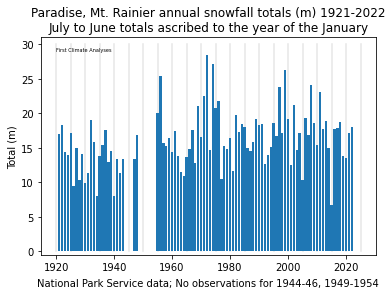

In [46]:
# Make a plot
plt.clf()
fig, ax = plt.subplots()
plt.bar( df['Year'], df['Total (in)']*2.54/100, zorder=10 )
# ax.set_aspect(10)   # Set the aspect ratio
plt.gca().set_ylim( ( -0.5, 31 ))
plt.title( r'Paradise, Mt. Rainier annual snowfall totals (m) 1921-2022' '\n'
           r'July to June totals ascribed to the year of the January' )
plt.ylabel( 'Total (m)')
tpm.plot_vertical_lines( np.arange( 1920, 2030, 5 ), ( 0, 30 ), zorder=0 )
plt.text( np.mean( plt.gca().get_xlim() ), -5, \
         'National Park Service data; No observations for 1944-46, 1949-1954', ha='center' )
plt.text( 1920, 29, 'First Climate Analyses', fontsize=5 )  # My branding
plt.savefig( 'snowmtrainierjulytojunetotal19212022.png', dpi=300 )
plt.show()